In [35]:
import glworia.load_interp
from glworia.load_interp import *
import bilby_scripts.waveform
from bilby_scripts.waveform import *
import bilby

In [36]:
import configparser
import matplotlib.pyplot as plt

In [37]:
from importlib import reload

In [38]:
reload(glworia.load_interp)
from glworia.load_interp import *
reload(bilby_scripts.waveform)
from bilby_scripts.waveform import *

In [14]:
import matplotlib.pyplot as plt

In [15]:
lp_name = 'x_c'

settings = {
    'lens_param_name': lp_name,
    'y_low': 0.1,
    'y_high': 5.0,
    lp_name + '_low': 0.,
    lp_name + '_high': 1.,
    'N_grid': 31,
    'N_grid_strong': 61,
    'N_crit': 61,
    'N': 200,
    'lens_model_name': 'CIS',

    'T0_max': 1000,

    'y_low_im': 0.1,
    'y_high_im': 5.0,
    lp_name + '_low_im': 0.,
    lp_name + '_high_im': 1.,
    'N_grid_im': 201,
    'N_crit_im': 201,
}

In [16]:
# def strong_lens_cond_override_gSIS(strongly_lensed, y_interp, kappa_interp):
#     if np.abs(kappa_interp - 1.) < 1e-15:
#         if y_interp < 1.:
#             strongly_lensed = True
#         else:
#             strongly_lensed = False
#     return strongly_lensed

In [17]:
w_interp = np.linspace(0.001, 1e4, 10**6)

In [18]:
y_interp = 2.0
lp_interp = 0.1

In [78]:
y_interp = 1.5
lp_interp = 0.

In [79]:
F, F_g, partitions, T_im, mu_im, u0, u1, u2, u3, um, w1, F1, w2, F2 = F_interp(w_interp, y_interp, lp_interp, interpolators, settings,
             return_geom = True, 
            #  strong_lens_cond_override = strong_lens_cond_override_gSIS
             )

In [80]:
T_im

[0, 0, 0]

In [81]:
mu_im

[0, 0, array(1.66863887)]

In [82]:
partitions

array([ 0.        ,  0.77732295, 15.54645897])

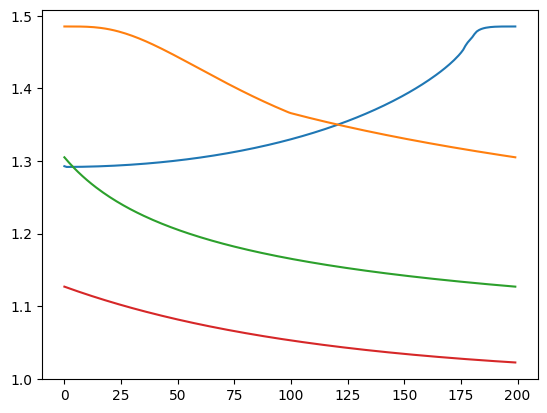

In [83]:
plt.plot(u0)
plt.plot(u1)
plt.plot(u2)
plt.plot(u3)

In [84]:
import matplotlib.pyplot as plt

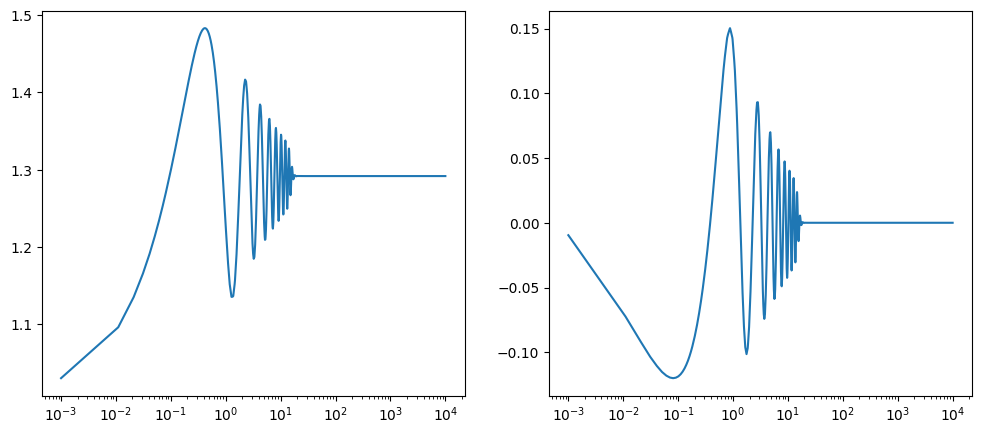

In [85]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].semilogx(w_interp/w_fac/500, np.abs(F))
# axs[0].semilogx(w_interp, np.abs(F_g), alpha = 0.5)
axs[1].semilogx(w_interp/w_fac/500, np.angle(F))

(1.0, 2.0)

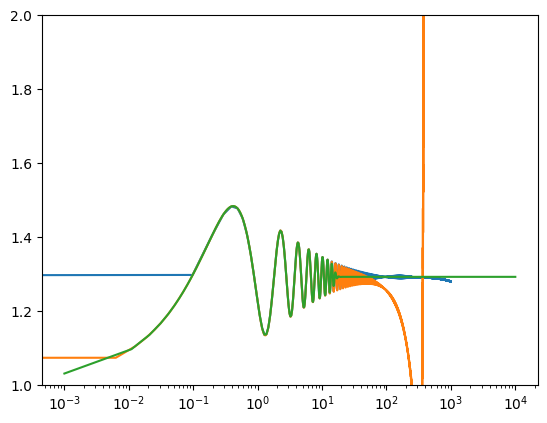

In [86]:
# cut at 1e3

F1_cut = F1[w1 < 1e3]
w1_cut = w1[w1 < 1e3]
F2_cut = F2[w2 < 1e3]
w2_cut = w2[w2 < 1e3]

plt.semilogx(w1_cut, np.abs(F1_cut))
plt.semilogx(w2_cut, np.abs(F2_cut))
plt.semilogx(w_interp, np.abs(F))

plt.ylim(1, 2)

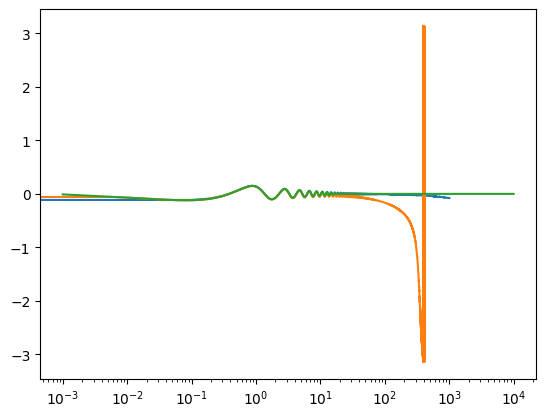

In [87]:
plt.semilogx(w1_cut, np.angle(F1_cut))
plt.semilogx(w2_cut, np.angle(F2_cut))
plt.semilogx(w_interp, np.angle(F))

# plt.ylim(1, 2)

In [54]:
F_scale = np.max(np.abs(F-1))/2

(0.001, 10.0)

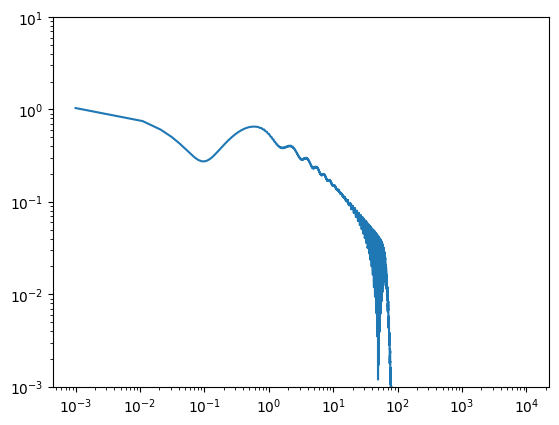

In [55]:
fig, ax = plt.subplots()
ax.loglog(w_interp, np.abs((F-F_g)/F_scale))
ax.set_ylim(1e-3, 1e1)